<a href="https://colab.research.google.com/github/ravenclown/ML-Practices/blob/main/Bioinformatic_alg_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem
A DNA string is a reverse palindrome if it is equal to its reverse complement. For instance, GCATGC is a reverse palindrome because its reverse complement is GCATGC. See Figure 2.

#Given:
A DNA string of length at most 1 kbp in FASTA format.

##Return:
The position and length of every reverse palindrome in the string having length between 4 and 12. You may return these pairs in any order.

In [ ]:
!pip install Bio -q

Library calls and functions

In [ ]:
from Bio.Seq import Seq
from Bio import SeqIO
import time
import matplotlib.pyplot as plt

def check_rev_palindrome(seq):
    if (seq == seq.reverse_complement()):
        return 1
    else:
        return 0

def read_fasta_file(file):
    for seq_record in SeqIO.parse(file, "fasta"):
        return seq_record.seq

seq = read_fasta_file("rosalind_revp_1_dataset.txt")

Brute Force ( steps are 4,5,6,..12)

In [ ]:
def brute_force_v1(seq):
  t0 = time.time()
  final_list=[]
  for i in range(4,13):
      for j in range(len(seq)-i+1):
          if check_rev_palindrome(seq[j:j+i]):
              a=(j+1,i)
              final_list.append(a)
  t1 = time.time()
  total = t1-t0
  final_list.sort()
  ##print("\n".join([f"{a}, {b}" for a, b in final_list]))
  return final_list,total
result,total=brute_force_v1(seq)


Range is halved ( steps are 4,6,8,..12)

In [ ]:
def brute_force_v2(seq):
  t0 = time.time()
  final_list=[]
  for i in range(4,13,2):
      for j in range(len(seq)-i+1):
          if check_rev_palindrome(seq[j:j+i]):
              a=(j+1,i)
              final_list.append(a)
  t1 = time.time()
  total = t1-t0
  final_list.sort()
  ##print("\n".join([f"{a}, {b}" for a, b in final_list]))
  return final_list,total
result,total=brute_force_v2(seq)

ChatGPT's optimized version

In [ ]:
def optimized_find_reverse_palindromes(seq):
    results = []
    start_time = time.time()
    for length in range(4, 13):
        for start in range(len(seq) - length + 1):
            subseq = seq[start:start+length]
            if check_rev_palindrome(subseq):
                results.append((start+1, length))
    end_time = time.time()
    total = end_time - start_time
    return results, total
result,total=optimized_find_reverse_palindromes(seq)

In [ ]:
v1_times=[]
v2_times=[]
v3_times=[]

for i in range(100):
  _,t1=brute_force_v1(seq)
  _,t2=brute_force_v2(seq)
  _,t3=optimized_find_reverse_palindromes(seq)
  v1_times.append(t1)
  v2_times.append(t2)
  v3_times.append(t3)


<ipython-input-67-9d31d825623e>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["Brute Force V1","Brute Force V2", "Optimized V3"], patch_artist=True,


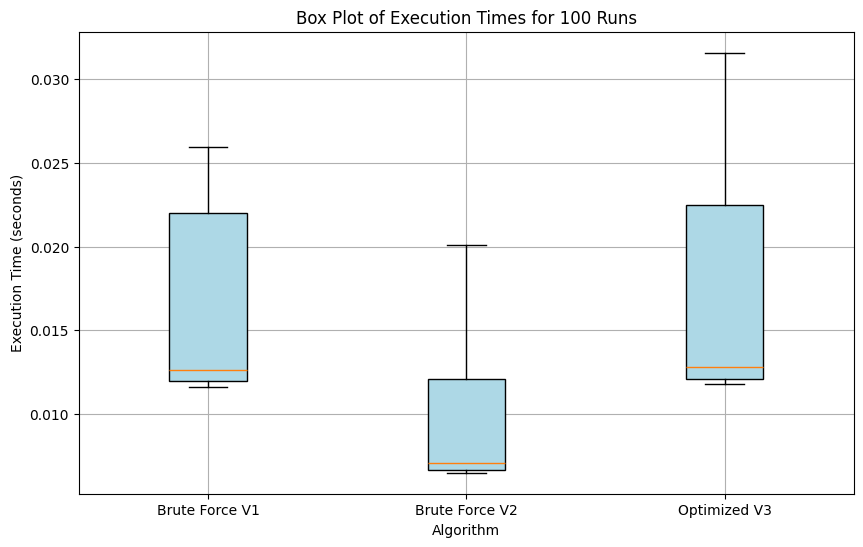

In [ ]:
plt.figure(figsize=(10, 6))
data = [v1_times,v2_times,v3_times]

plt.boxplot(data, labels=["Brute Force V1","Brute Force V2", "Optimized V3"], patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="black"),
            whiskerprops=dict(color="black"),
            flierprops=dict(markerfacecolor="red", marker="o", markersize=5))

plt.title("Box Plot of Execution Times for 100 Runs")
plt.ylabel("Execution Time (seconds)")
plt.xlabel("Algorithm")
plt.grid(True)
plt.show()